In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.animation as animation

import imageio


In [2]:
# C:\Users\cruze\Documents\GitHub\covid19\csse_covid_19_data\csse_covid_19_time_series

confirmed_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_confirmed_US.csv')
confDF = pd.read_csv(confirmed_path)

# dateDict = dict(zip(confDF.columns[11:], pd.to_datetime(confDF.columns[11:])))
# confDF = confDF.rename(dateDict, axis='columns')

In [3]:
byStateDF = confDF.groupby('Province_State').sum()

states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming']

byStateDF = byStateDF.loc[states]

In [29]:
# byStateDF[byStateDF < 1] = 1

dfData = byStateDF.iloc[:, 5:]
dfLabels = byStateDF.iloc[:, :5]
labels = dfLabels.index.tolist()

dfDiff = dfData.diff(axis=1).iloc[:,1:]
dfData = dfData.iloc[:,1:]

dfDiff = dfDiff.transpose().rolling(window=3).mean().transpose()

plt_path = os.path.join(os.getcwd(), 'plots')

dfData[dfData < 1] = 1
dfDiff[dfDiff < 1] = 1


In [30]:

for j in range(0,int(len(dfData.columns))):

    plotname = 'plot' + str(j).zfill(4) + '.png'
    plot_path = os.path.join(os.getcwd(), 'plots', plotname)
    

    plt.figure(figsize=(22, 10))
    plt.plot(dfData.iloc[:,:j].transpose(), dfDiff.iloc[:,:j].transpose(), alpha=0.2)

    for i, lab in enumerate(labels):
        x = dfData.iloc[i,j-1]
        y = dfDiff.iloc[i,j-1]
        plt.scatter(x, y, marker='o', color='red')
        plt.text(x+0.3, y+0.3, lab, fontsize=9)

    plt.title('Confirmed Cases on ' + dfData.iloc[:,j].name + ' vs. Total Cases ')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Total Cases')
    plt.ylabel('New Daily Cases')
    plt.xlim(1, 100000)
    plt.ylim(1, 10000)
    plt.xticks(rotation='vertical')

    plt.savefig(plot_path)
    plt.clf()
    plt.close()
    # plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

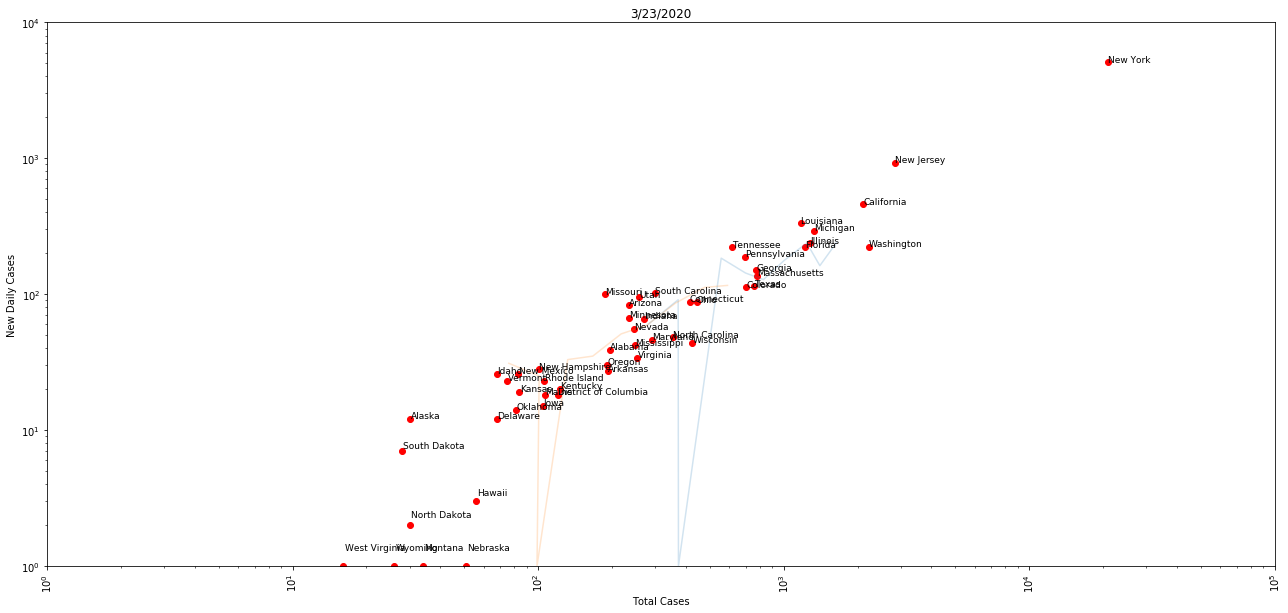

In [7]:
j = 60

x = dfData.diff(axis=1)
plotname = 'plot' + str(j) + '.png'
plot_path = os.path.join(os.getcwd(), 'plots', plotname)


plt.figure(figsize=(22, 10))

plt.plot(dfData.iloc[4:6,50:j].transpose(), dfDiff.iloc[4:6,50:j].transpose(), alpha=0.2)

for i, lab in enumerate(labels):
    x = dfData.iloc[i,j]
    y = dfDiff.iloc[i,j]
    plt.scatter(x, y, marker='o', color='red')
    plt.text(x+0.3, y+0.3, lab, fontsize=12)

plt.title(dfData.iloc[:,j].name)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Total Cases')
plt.ylabel('New Daily Cases')
plt.xlim(1, 100000)
plt.ylim(1, 10000)
plt.xticks(rotation='vertical')

plt.savefig(plot_path)
# plt.clf()
# plt.close()
plt.show()



In [31]:

img_path = os.path.join(os.getcwd(), 'plots')
filenames = os.listdir(img_path)
save_path = os.path.join(os.getcwd(), 'animated.gif')

print('reading files...')

d = "plots"
filenames = []
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        filenames.append(full_path)

print('saving gif...')

filenames = filenames[35:]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(save_path, images, duration=.7)

reading files...
saving gif...
